In [5]:
from deepsight.zoo.foodwaste import create_classification_dataset,get_label_mapping
from deepsight.core.data import ClassificationVisionDataLoader
from deepsight.integrations import DeepchecksRunner
from deepsight.utils import DeepchecksConfig
from deepsight.zoo.timm_models import CLIPModel
import json

In [6]:
ing2name, ing2label = get_label_mapping()

Getting label mapping: 100%|██████████| 375/375 [00:03<00:00, 94.46it/s] 


In [7]:
ing2name

OrderedDict([(90169064, 'dressing_portion'),
             (90284505, 'sauerkraut'),
             (90764221, 'eisbergsalat'),
             (90776750, 'paprika'),
             (90799084, 'reibekuchen'),
             (91366696, 'rotkohl'),
             (91369326, 'zucchini'),
             (91388363, 'pilze'),
             (91412043, 'linsen'),
             (91428454, 'apfelmus'),
             (91428764, 'sahne'),
             (91434330, 'grüne_bohnen'),
             (91434357, 'blumenkohl'),
             (91511750, 'erbsen'),
             (91511769, 'möhre'),
             (91511777, 'reis'),
             (91511785, 'kartoffelwürfel'),
             (91511793, 'kartoffeln'),
             (91511823, 'braune_sauce'),
             (91511831, 'helle_sauce'),
             (91533770, 'wirsing'),
             (91533800, 'hähnchen'),
             (91539999, 'hähnchenstreifen'),
             (91551949, 'bratenjus'),
             (91555332, 'zwiebel'),
             (91560638, 'semmelknödel'),
       

In [8]:
ing2label

OrderedDict([(90169064, 0),
             (90284505, 1),
             (90764221, 2),
             (90776750, 3),
             (90799084, 4),
             (91366696, 5),
             (91369326, 6),
             (91388363, 7),
             (91412043, 8),
             (91428454, 9),
             (91428764, 10),
             (91434330, 11),
             (91434357, 12),
             (91511750, 13),
             (91511769, 14),
             (91511777, 15),
             (91511785, 16),
             (91511793, 17),
             (91511823, 18),
             (91511831, 19),
             (91533770, 20),
             (91533800, 21),
             (91539999, 22),
             (91551949, 23),
             (91555332, 24),
             (91560638, 25),
             (91562770, 26),
             (91562779, 27),
             (91606492, 28),
             (91613413, 29),
             (91613421, 30),
             (91614665, 31),
             (91622080, 32),
             (91710370, 33),
             (91862294, 

In [9]:
train_dataset = create_classification_dataset(ing2label,split='train',image_size=1024)
test_dataset = create_classification_dataset(ing2label,split='test',image_size=1024)

In [10]:
len(test_dataset), len(train_dataset)

(160, 215)

In [11]:
img,label = train_dataset[0]

In [12]:
ingredients = list(ing2name.values())
ingredients

['dressing_portion',
 'sauerkraut',
 'eisbergsalat',
 'paprika',
 'reibekuchen',
 'rotkohl',
 'zucchini',
 'pilze',
 'linsen',
 'apfelmus',
 'sahne',
 'grüne_bohnen',
 'blumenkohl',
 'erbsen',
 'möhre',
 'reis',
 'kartoffelwürfel',
 'kartoffeln',
 'braune_sauce',
 'helle_sauce',
 'wirsing',
 'hähnchen',
 'hähnchenstreifen',
 'bratenjus',
 'zwiebel',
 'semmelknödel',
 'rinderbraten',
 'schweinenackenbraten',
 'schinken_mettwurst',
 'rostbratwurst',
 'schnitzel',
 'pflanzencreme',
 'seelachs',
 'eierspätzle',
 'kartoffelpüree',
 'fleischbällchen_gebrüht',
 'paniertes_fischfilet',
 'linseneintopf',
 'tomaten-curry-sauce',
 'malzbier-senf-sauce',
 'krautsalat']

In [13]:
model = CLIPModel('PE-Core-T-16-384',ingredients)

In [14]:
probs = model.predict(img.unsqueeze(0))
probs

tensor([15])

In [17]:
probs.item(), label

(15, 21)

In [16]:
vision_train_data = ClassificationVisionDataLoader.load_from_dataset(train_dataset,batch_size=8,shuffle=True,model=model)
vision_test_data = ClassificationVisionDataLoader.load_from_dataset(test_dataset,batch_size=8,shuffle=True,model=model)

In [17]:
config = DeepchecksConfig(train_test_validation=True,
                            data_integrity=True,
                            model_evaluation=True,
                            save_results=True,
                            save_display=False,
                            save_results_format='json',
                            output_dir='results')
                            
checks_runner = DeepchecksRunner(config)

In [ ]:
results = checks_runner.run_suites(train_data=vision_train_data,test_data=vision_test_data)

Processing Batches:Train: 
 
 
 
 0/1 [Time: 00:00]

In [11]:
results

{'train_test_validation': Train Test Validation Suite,
 'data_integrity': Data Integrity Suite}

In [16]:
result = results['data_integrity']

In [19]:
result.results 

[Image Property Outliers: {'Aspect Ratio': {'outliers_identifiers': [], 'lower_limit': np.float64(1.0), 'upper_limit': np.float64(1.0)}, 'Area': {'outliers_identifiers': [], 'lower_limit': np.float64(1048576.0), 'upper_limit': np.float64(1048576.0)}, 'Brightness': {'outliers_identifiers': array(['7', '0', '1', '2', '2', '5', '9', '13', '8', '9', '17', '20',
        '21', '18', '20', '17', '18', '21'], dtype='<U3'), 'lower_limit': np.float64(167.70577639374997), 'upper_limit': np.float64(183.91261626375004)}, 'RMS Contrast': {'outliers_identifiers': [], 'lower_limit': np.float64(43.17277834778543), 'upper_limit': np.float64(83.74600604769405)}, 'Mean Red Relative Intensity': {'outliers_identifiers': [], 'lower_limit': np.float64(0.3241544530997467), 'upper_limit': np.float64(0.3448062138589889)}, 'Mean Green Relative Intensity': {'outliers_identifiers': array(['2', '6', '7', '14', '15', '10', '8', '11', '15', '19', '19', '23'],
       dtype='<U3'), 'lower_limit': np.float64(0.3310470656

In [20]:
[type(r) for r in result.results]

[deepchecks.core.check_result.CheckResult,
 deepchecks.core.check_result.CheckResult,
 deepchecks.core.check_result.CheckResult,
 deepchecks.core.check_result.CheckResult,
 deepchecks.core.check_result.CheckFailure,
 deepchecks.core.check_result.CheckFailure]

In [30]:
json.loads(result.results[-1].to_json(with_display=False))

{'header': 'Label Property Outliers',
 'type': 'CheckFailure',
 'check': {'name': 'Label Property Outliers',
  'params': {'n_show_top': 3,
   'iqr_percentiles': [25, 75],
   'iqr_scale': 1.5,
   'min_samples': 10,
   'n_samples': 10000},
  'summary': 'Find outliers labels with respect to the given properties.'},
 'exception': 'task type classification does not have default label properties for label outliers.'}

In [25]:
[r.get_metadata().get('header') for r in result.results]

['Image Property Outliers',
 'Image Property Outliers',
 'Property Label Correlation',
 'Property Label Correlation',
 'Label Property Outliers',
 'Label Property Outliers']

In [ ]:
[type(r)  for r in result.results[5].display]

[str,
 str,
 plotly.graph_objs._figure.Figure,
 str,
 str,
 str,
 plotly.graph_objs._figure.Figure]

In [58]:
[r for r in result.results[5].display if isinstance(r,str)]

['\n        <span>\n        The shown features are the image properties (brightness, aspect ratio, etc.) that are most important for the\n        domain classifier - the domain_classifier trained to distinguish between the train and test datasets.<br>\n        </span>\n        ',
 '\n    <span>\n    The percents of explained dataset difference are the importance values for the feature calculated\n    using `permutation_importance`.\n    </span><br><br>\n    ',
 '<h3>Main features contributing to drift</h3>',
 'Showing only the top 3 columns, you can change it using n_top_columns param',
 'For discrete distribution plots, showing the top 10 categories with largest difference between train and test.']

In [55]:
result.results[4] #.display[5]

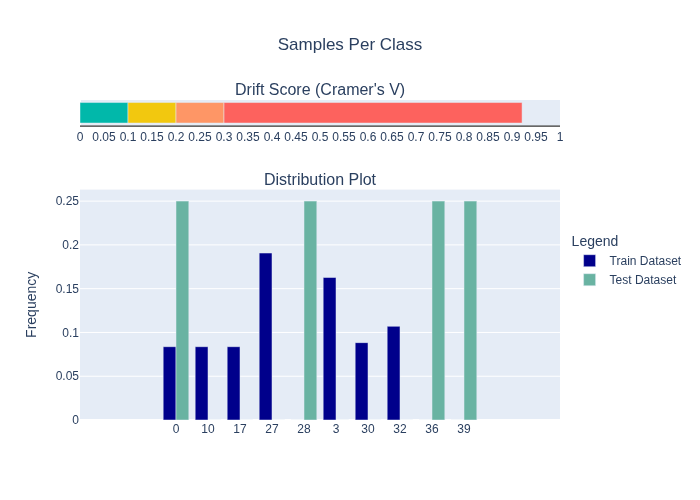

In [37]:
Image.open(image)

In [24]:
json.loads(result.results[1].to_json(with_display=False))

{'type': 'CheckResult',
 'check': {'name': 'Label Drift',
  'params': {'margin_quantile_filter': 0.025,
   'max_num_categories_for_drift': None,
   'min_category_size_ratio': 0.01,
   'max_num_categories_for_display': 10,
   'show_categories_by': 'largest_difference',
   'numerical_drift_method': 'KS',
   'categorical_drift_method': 'cramers_v',
   'balance_classes': False,
   'aggregation_method': None,
   'min_samples': 10,
   'n_samples': 10000},
  'summary': '    Calculate label drift between train dataset and test dataset, using statistical measures. <a href="https://docs.deepchecks.com/0.19/vision/auto_checks/train_test_validation/plot_label_drift.html?utm_source=display_output&utm_medium=referral&utm_campaign=check_link" target="_blank">Read More...</a>'},
 'header': 'Label Drift',
 'value': {'Samples Per Class': {'Drift score': {'dtype': 'float64',
    'value': 0.9209742449749333},
   'Method': "Cramer's V"}},
 'conditions_results': [{'Status': 'FAIL',
   'Condition': 'categori

In [62]:
result.results[0].to_json(with_display=False)

'{"type": "CheckResult", "check": {"name": "New Labels", "params": {"max_images_to_display_per_label": 3, "max_new_labels_to_display": 3, "n_samples": 10000}, "summary": "Detects labels that appear only in the test set. <a href=\\"https://docs.deepchecks.com/0.19/vision/auto_checks/train_test_validation/plot_new_labels.html?utm_source=display_output&utm_medium=referral&utm_campaign=check_link\\" target=\\"_blank\\">Read More...</a>"}, "header": "New Labels", "value": {"new_labels": {"36": 40, "39": 40, "28": 40}, "all_labels_count": 160}, "conditions_results": [{"Status": "FAIL", "Condition": "Percentage of new labels in the test set is less or equal to 0.5%", "More Info": "75% of labels found in test set were not in train set. New labels most common in test set: [\'36\', \'39\', \'28\']"}], "display": null}'

In [64]:
result.results[0].get_metadata()

{'header': 'New Labels',
 'name': 'New Labels',
 'params': {'max_images_to_display_per_label': 3,
  'max_new_labels_to_display': 3,
  'n_samples': 10000},
 'summary': 'Detects labels that appear only in the test set.'}

In [96]:
result.results[0].conditions_results

[{'details': "75% of labels found in test set were not in train set. New labels most common in test set: ['36', '39', '28']", 'category': <ConditionCategory.FAIL: 'FAIL'>, 'name': 'Percentage of new labels in the test set is less or equal to 0.5%'}]

In [88]:
json.loads(result.results[0].to_json(False))

{'type': 'CheckResult',
 'check': {'name': 'New Labels',
  'params': {'max_images_to_display_per_label': 3,
   'max_new_labels_to_display': 3,
   'n_samples': 10000},
  'summary': 'Detects labels that appear only in the test set. <a href="https://docs.deepchecks.com/0.19/vision/auto_checks/train_test_validation/plot_new_labels.html?utm_source=display_output&utm_medium=referral&utm_campaign=check_link" target="_blank">Read More...</a>'},
 'header': 'New Labels',
 'value': {'new_labels': {'36': 40, '39': 40, '28': 40},
  'all_labels_count': 160},
 'conditions_results': [{'Status': 'FAIL',
   'Condition': 'Percentage of new labels in the test set is less or equal to 0.5%',
   'More Info': "75% of labels found in test set were not in train set. New labels most common in test set: ['36', '39', '28']"}],
 'display': None}

In [57]:
result.results[-1].display[6].write_image('out.png')

In [63]:
dir(result.results[0])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_ipython_display_',
 '_repr_html_',
 '_repr_json_',
 '_repr_mimebundle_',
 'check',
 'conditions_results',
 'display',
 'display_check',
 'from_json',
 'get_check_id',
 'get_header',
 'get_metadata',
 'have_conditions',
 'have_display',
 'header',
 'html_serializer',
 'ipython_serializer',
 'passed_conditions',
 'priority',
 'process_conditions',
 'reduce_output',
 'run_time',
 'save_as_html',
 'show',
 'show_in_iframe',
 'show_in_window',
 'show_not_interactive',
 'to_json',
 'to_wandb',
 'to_widget',
 'value',
 'widget_serializer']

In [ ]:
results['train_test_validation']